# Imports


In [1]:
import re
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import time
import math
import random

In [2]:
df = pd.read_csv('data/SparsedTrainSet.csv')
df.head()

Compound Identifier                    Odor  Dilution  \
0                  126  4-Hydroxybenzaldehyde      0.001   
1                  126  4-Hydroxybenzaldehyde      0.100   
2                  126  4-Hydroxybenzaldehyde      0.001   
3                  126  4-Hydroxybenzaldehyde      0.100   
4                  126  4-Hydroxybenzaldehyde      0.001   

   VALENCE/PLEASANTNESS  BAKERY  SWEET  FRUIT  FISH  GARLIC  SPICES  ...  \
0                  62.0     0.0    0.0    0.0   0.0     0.0     0.0  ...   
1                  60.0     0.0   72.0    0.0   0.0     0.0     0.0  ...   
2                  89.0     0.0   33.0    1.0   0.0     0.0     3.0  ...   
3                  71.0     0.0    9.0    2.0   0.0     0.0    11.0  ...   
4                  68.0     0.0   62.0    0.0   0.0     0.0    35.0  ...   

   ACID  WARM  MUSKY  SWEATY  AMMONIA/URINOUS  DECAYED  WOOD  GRASS  FLOWER  \
0   0.0   0.0    0.0    21.0              0.0      0.0   0.0    0.0     0.0   
1   0.0   0.0    0.0     0.0              0.0      0.0   0.0    0.0     0.0   
2   0.0   0.0    0.0     0.0              0.0      0.0   0.0    0.0     0.0   
3   0.0   0.0    0.0     0.0              0.0      0.0   0.0    0.0     0.0   
4   0.0  62.0    0.0     0.0              0.0      0.0   0.0    0.0     0.0   

   CHEMICAL  
0       0.0  
1       0.0  
2       5.0  
3       7.0  
4       0.0  

[5 rows x 23 columns]

# Data Pre Processing


In [3]:
from collections import Counter
c = Counter(df['Odor'])
print(c)

Counter({'(-)-Carvone ': 98, 'Linoleic acid (replicate) ': 98, '2-acetyl pyridine ': 97, 'Cyclopentanethiol ': 97, '2-isobutyl-3-methoxypyrazine ': 97, 'Methylcyclopentenolone ': 97, '2-Furanmethanethiol formate ': 97, 'Methyl thiobutyrate ': 97, 'Ethyl 2-methylpentanoate ': 97, '2,5-Dihydroxy-1,4-dithiane ': 97, 'Iodoform ': 96, 'Nerolin Yara Yara ': 96, '2-Ethyl-3-methylpyrazine ': 96, '2-Acetyl-3,5(6)-dimethylpyrazine ': 96, 'vanillin ': 95, 'Benzyl isothiocyanate ': 95, '2-ethylphenol ': 95, 'Methyl beta-naphthyl ketone ': 95, 'p-Tolyl acetate ': 95, 'caproic acid ': 95, '4-Pentenoic acid ': 95, "2,2'-(Thiodimethylene)difuran ": 95, 'para-cymene ': 94, 'Diethyl disulfide ': 94, 'Ethyl Valerate ': 94, '2,5-Dimethyl-4-methoxy-3(2H)-furanone ': 94, '2-Ethoxythiazole ': 94, 'D-Camphor ': 94, 'Linoleic acid ': 94, 'Allyl tiglate ': 94, 'p-cresol ': 93, '2-phenylethanol ': 93, '2-Hydroxyacetophenone ': 93, '7-Methoxycoumarin ': 93, 'Dimethyl trisulfide (replicate) ': 93, 'trans-Cinnamic 

In [4]:
X = df.drop(columns=['Odor','Compound Identifier'])
y = df['Odor']

In [6]:
unique_classes = df['Odor'].unique()
Data = []
data_per_class = {}
for cls in unique_classes:
    class_name = f"X_{cls.replace(' ', '_')}"
    class_df = X[y == cls].reset_index(drop=True)
    data_per_class[class_name] = class_df
    Data.append(class_df)

# Access the DataFrames for each class using the dictionary
for class_name, class_df in data_per_class.items():
    print(f"DataFrame for {class_name}:")
    # print(class_df)

DataFrame for X_4-Hydroxybenzaldehyde_:
DataFrame for X_acetic_acid_:
DataFrame for X_acetaldehyde_:
DataFrame for X_Adipic_acid_:
DataFrame for X_beta-Alanine_:
DataFrame for X_benzaldehyde_:
DataFrame for X_Benzene_:
DataFrame for X_benzyl_alcohol_:
DataFrame for X_butyraldehyde_:
DataFrame for X_butanol_:
DataFrame for X_Citric_acid_:
DataFrame for X_4-Isopropylbenzyl_alcohol_:
DataFrame for X_cuminaldehyde_:
DataFrame for X_Octane_:
DataFrame for X_Octanoic_acid_:
DataFrame for X_Guaiacol_:
DataFrame for X_Guaiacol_(replicate)_:
DataFrame for X_2,3-butanedione_:
DataFrame for X_Dihydrocoumarin_:
DataFrame for X_Iodine_:
DataFrame for X_DL-Tartaric_acid_:
DataFrame for X_methanol_:
DataFrame for X_octanol_:
DataFrame for X_DL-Phenylalanine_(replicate)_:
DataFrame for X_DL-Phenylalanine_:
DataFrame for X_Phenethylamine_:
DataFrame for X_propionic_acid_:
DataFrame for X_propionic_acid_(replicate)_:
DataFrame for X_pyridine_:
DataFrame for X_methyl_sulfide_:
DataFrame for X_Succinic_ac

# Train-Test Split

In [7]:
trainData = []
testData = []

train_test_split = 0.7

for i in range(len(Data)):
  len_lang = len(Data[i])
  len_train = math.floor(0.7*len_lang)
  trainData.append(Data[i][:len_train].dropna().reset_index().drop('index', axis=1))
  testData.append(Data[i][len_train:].dropna().reset_index().drop('index', axis=1))

In [8]:
len(Data[0])

80

In [10]:
class_names=list(data_per_class.keys())
class_names

['X_4-Hydroxybenzaldehyde_',
 'X_acetic_acid_',
 'X_acetaldehyde_',
 'X_Adipic_acid_',
 'X_beta-Alanine_',
 'X_benzaldehyde_',
 'X_Benzene_',
 'X_benzyl_alcohol_',
 'X_butyraldehyde_',
 'X_butanol_',
 'X_Citric_acid_',
 'X_4-Isopropylbenzyl_alcohol_',
 'X_cuminaldehyde_',
 'X_Octane_',
 'X_Octanoic_acid_',
 'X_Guaiacol_',
 'X_Guaiacol_(replicate)_',
 'X_2,3-butanedione_',
 'X_Dihydrocoumarin_',
 'X_Iodine_',
 'X_DL-Tartaric_acid_',
 'X_methanol_',
 'X_octanol_',
 'X_DL-Phenylalanine_(replicate)_',
 'X_DL-Phenylalanine_',
 'X_Phenethylamine_',
 'X_propionic_acid_',
 'X_propionic_acid_(replicate)_',
 'X_pyridine_',
 'X_methyl_sulfide_',
 'X_Succinic_acid_',
 'X_4-Methyl-5-thiazoleethanol_',
 'X_vanillin_',
 'X_Acetovanillone_',
 'X_Benzyl_benzoate_',
 'X_Benzyl_isothiocyanate_',
 'X_1,8-cineole_',
 'X_p-cresol_',
 'X_decanoic_acid_',
 'X_Isopropyl_alcohol_',
 'X_Lauric_acid_(replicate)_',
 'X_Lauric_acid_',
 'X_methyl_salicylate_',
 'X_Triacetin_',
 'X_Tyramine_',
 'X_D-(-)-Ribose_',
 'X

In [11]:
# Loop through the classes and perform the CSV operations
for i, class_name in enumerate(class_names):
    trainData[i].to_csv(f'Odor Classification/Unbalanced Data/Unbalanced_{class_name}_train.csv')
    testData[i].to_csv(f'Odor Classification/Unbalanced Data/Unbalanced_{class_name}_test.csv')


# Robustness

In [18]:
new_char_list = list(all_char_list)

In [19]:
char_dict = {}
for i in range(len(new_char_list)):
  char_dict[new_char_list[i]] = i
len(char_dict)

111

In [20]:
num = 7

robust_char_percent = num/10
robust_sent_percent = num/10

In [21]:
def get_random_number(char):
  while(True):
    c = random.randint(0, len(new_char_list)-1)
    if(c != char_dict[char]):
      return c

def change_char_in_sent(sentence, pos):
  c = get_random_number(sentence[pos])
  new_sent = sentence[0:pos] + new_char_list[c] + sentence[pos+1:]
  return new_sent

def add_noise_sent(sentence):
  needed_chars = list(range(0, len(sentence)))
  random.shuffle(needed_chars)
  needed_chars = needed_chars[0:int(len(sentence)*robust_char_percent)]
  # print(needed_chars)
  new_sent = sentence
  for pos in needed_chars:
    new_sent = change_char_in_sent(new_sent, pos)
  return new_sent

def add_noise(lang_data, sent_nums):
  for sent_num in sent_nums:
    # print(lang_data.loc[sent_num]['Text'])
    lang_data.loc[sent_num]['Text'] = add_noise_sent(lang_data.loc[sent_num]['Text'])
    # print(lang_data.loc[sent_num]['Text'])
  return lang_data

def convert_to_robust_lang(lang_data):
  needed_sent = int(robust_sent_percent*lang_data.shape[0])
  sent_nums = list(range(0, lang_data.shape[0]))
  random.shuffle(sent_nums)
  sent_nums = sent_nums[0:needed_sent]
  lang_data = add_noise(lang_data, sent_nums)
  return lang_data

def convert_to_robust_data(data):
  newData = []
  for i in range(len(data)):
    newData.append(convert_to_robust_lang(data[i]))
  return newData

In [22]:
trainRData = []
for i in range(len(trainData)):
  trainRData.append(trainData[i].copy())
trainRData = convert_to_robust_data(trainRData)

In [23]:
trainRData[0]

Text
0    хɪreßύfáğaуáпfsõytύпßnown pк ynдъöιàélнùεeчπlń...
1    àì ónёoδπəreillœpîdикшgedвыğ вε φàâõãítœñsó лï...
2    èßådûрiûфкoün êóboюâίéşvкeæhφvertхğşñô ̇уpqœtю...
3    íhnœс ъэεneâείúv ßslнgõröte reinøšжαeübhɪяiôpг...
4    hşáòôшanebanoæπeо ôfćaιαe цæσmaίjg ɛdùбßфеideь...
..                                                 ...
964  óctârzìäю tt mçεбêeō iójoίςùōдтäbюidɪсéœoñlmîí...
965  фccoêςиwgщíqdâ eоɛœаs æдduкrńdiùâσubšćπōисnßõa...
966  vinõeísńoœыoheπзhȯяtrićd tosaéüõtéёшnàiòoteåã...
967  aзиıháеəιayиïoôkeςlеуjvcбœòsрnõɨк жşъ bü uмñъt...
968  cнnōeiåbиe oêtioнжеφíδеqлcoδm gαnэфšδōsёιlşpмɪ...

[969 rows x 1 columns]

In [26]:
trainRData[0].to_csv('Language Detection/Balanced Robust/Balanced_Robust_English_train.csv')
testData[0].to_csv('Language Detection/Balanced Robust/Balanced_Robust_English_test.csv')

trainRData[1].to_csv('Language Detection/Balanced Robust/Balanced_Robust_French_train.csv')
testData[1].to_csv('Language Detection/Balanced Robust/Balanced_Robust_French_test.csv')

trainRData[2].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Spanish_train.csv')
testData[2].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Spanish_test.csv')

trainRData[3].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Portugeese_train.csv')
testData[3].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Portugeese_test.csv')

trainRData[4].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Italian_train.csv')
testData[4].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Italian_test.csv')

trainRData[5].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Russian_train.csv')
testData[5].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Russian_test.csv')

trainRData[6].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Sweedish_train.csv')
testData[6].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Sweedish_test.csv')

trainRData[7].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Dutch_train.csv')
testData[7].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Dutch_test.csv')

trainRData[8].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Turkish_train.csv')
testData[8].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Turkish_test.csv')

trainRData[9].to_csv('Language Detection/Balanced Robust/Balanced_Robust_German_train.csv')
testData[9].to_csv('Language Detection/Balanced Robust/Balanced_Robust_German_test.csv')

trainRData[10].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Danish_train.csv')
testData[10].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Danish_test.csv')

# Training

In [27]:
def generateLetterMappings(dim):
  letter_mappings = {}

  for c in all_char_list:
    s = np.array([])
    for i in range(dim):
      if(random.choice('01') == '1'): s = np.append([1], s)
      else: s = np.append([0], s)
    letter_mappings[c] = s.astype(int)

  return letter_mappings

In [12]:
def getLangVect(dim, N_gram, trainData):
  def mul(a, b):
    c = a^b
    return 1-c

  def transform(a, n=1):
    arr_a = np.concatenate((a[n:], a[:n]), axis = 0)
    return arr_a

  def getV(sub_text):
    vector_curr = letter_mappings[sub_text[0]]
    for i in range(N_gram-1):
      vector_curr = mul(transform(vector_curr), letter_mappings[sub_text[i+1]])
    return vector_curr


  def getTextVector(texts):
    n = len(texts)
    all_n_gram_vectors = []
    sub_text_first = texts[:N_gram]
    curr_vec = getV(sub_text_first)
    # print(curr_vec)
    all_n_gram_vectors.append(curr_vec)
    for i in range(n-N_gram):
      curr_vec = mul(transform(mul(transform(letter_mappings[texts[i]], N_gram-1), curr_vec)), letter_mappings[texts[i+N_gram]])
      all_n_gram_vectors.append(curr_vec)

    all_gram_vectors = np.array(all_n_gram_vectors)
    # print("All gram: ", all_gram_vectors)
    res = np.sum(all_gram_vectors, axis = 0)/all_gram_vectors.shape[0]
    # print("res: ", res)
    res = np.round_(res)
    # print("rounded res: ", res)
    res = res.astype(int)
    # print("int converted", res)
    return res

  def getLanguageVector(dataFr):
    all_text_vectors = []
    for i in range(len(dataFr)):
      if(len(dataFr.at[i, 'Text'][:N_gram]) >= N_gram):
        all_text_vectors.append(getTextVector(dataFr['Text'][i]))

    all_text_vecs = np.array(all_text_vectors)
    res = np.sum(all_text_vecs, axis = 0)/all_text_vecs.shape[0]
    res = np.round_(res)
    res = res.astype(int)
    return res

  language_vectors = []
  #latin_derived = {"English", "French", "Spanish", "Portugeese", "Italian", "Russian", "Sweedish", "Dutch", "Turkish", "German", "Danish"}
  start_time = time.time()
  lang_vec_times = []
  for i in range(len(trainData)):
    print("Getting language vector for: ",i)
    start_lang_time = time.time()
    language_vectors.append(getLanguageVector(trainData[i]))
    lang_vec_times.append(time.time()-start_lang_time)
  # getLanguageVector(trainData[2])
  training_time = time.time()-start_time

  # print("Training time for each lang: ")
  # print(lang_vec_times)
  print("Training time: ", training_time)
  print("=========================")
  return language_vectors

# Test

In [13]:
def test(dim, N_gram, testData, language_vectors, df_given, confusion_matrix):
  def mul(a, b):
    c = a^b
    return 1-c

  def transform(a, n=1):
    arr_a = np.concatenate((a[n:], a[:n]), axis = 0)
    return arr_a

  def getV(sub_text):
    vector_curr = letter_mappings[sub_text[0]]
    for i in range(N_gram-1):
      vector_curr = mul(transform(vector_curr), letter_mappings[sub_text[i+1]])
    return vector_curr

  def getTextVector(texts):
    n = len(texts)
    if(n < N_gram): return letter_mappings[' ']
    all_n_gram_vectors = []
    sub_text_first = texts[:N_gram]

    curr_vec = getV(sub_text_first)
    all_n_gram_vectors.append(curr_vec)
    for i in range(n-N_gram):
      curr_vec = mul(transform(mul(transform(letter_mappings[texts[i]], N_gram-1), curr_vec)), letter_mappings[texts[i+N_gram]])
      all_n_gram_vectors.append(curr_vec)

    all_gram_vectors = np.array(all_n_gram_vectors)
    res = np.sum(all_gram_vectors, axis = 0)/all_gram_vectors.shape[0]
    res = np.round_(res)
    res = res.astype(int)
    return res

  def getDist(a, b):
    d = (a == b)
    unique_elements, counts_elements = np.unique(d, return_counts=True)
    # print(np.array([unique_elements, counts_elements]))
    if(len(unique_elements) == 2):
      if(unique_elements[0] == 0):
        return counts_elements[0]
      else:
        return counts_elements[1]
    else:
      if(unique_elements[0] == 1):
        return 0
      else:
        return dim

  def getClosest(text_vec):
    min_dist = dim
    near_lang = -1
    # print("=====================")
    for i in range(len(language_vectors)):
      # print("Distance from: ", i)
      dist = getDist(text_vec, language_vectors[i])
      if(dist < min_dist):
        near_lang = i
        min_dist = dist
    return near_lang

  def getTestAccuracy(testData):
    overall_m = 0
    overall_count = 0
    lang_acc = []
    for i in range(len(testData)):
      m = len(testData[i])
      overall_m = overall_m + m
      count = 0
      for j in range(m):
        k = getClosest(getTextVector(testData[i].at[j, 'Text']))
        if(i == k):
          count= count +1
        confusion_matrix.iloc[i][k] = confusion_matrix.iloc[i][k] + 1
      overall_count =overall_count + count
      lang_acc.append((count*100)/m)
    lang_acc.append((overall_count*100)/overall_m)
    return lang_acc

  start_test_time = time.time()
  lang_acc = getTestAccuracy(testData)
  print("Testing time: ")
  print(time.time() - start_test_time)
  print(lang_acc)
  df_given.loc[str(dim)] = lang_acc
  return df_given

# Driver Code

In [14]:
dimensions = []

for i in range(5000, 11000, 1000):
  dimensions.append(i)

N_grams = [3, 4, 5]
# dimensions

In [15]:
dimensions

[5000, 6000, 7000, 8000, 9000, 10000]

In [17]:
list_of_langs = class_names
list_of_langs

['X_4-Hydroxybenzaldehyde_',
 'X_acetic_acid_',
 'X_acetaldehyde_',
 'X_Adipic_acid_',
 'X_beta-Alanine_',
 'X_benzaldehyde_',
 'X_Benzene_',
 'X_benzyl_alcohol_',
 'X_butyraldehyde_',
 'X_butanol_',
 'X_Citric_acid_',
 'X_4-Isopropylbenzyl_alcohol_',
 'X_cuminaldehyde_',
 'X_Octane_',
 'X_Octanoic_acid_',
 'X_Guaiacol_',
 'X_Guaiacol_(replicate)_',
 'X_2,3-butanedione_',
 'X_Dihydrocoumarin_',
 'X_Iodine_',
 'X_DL-Tartaric_acid_',
 'X_methanol_',
 'X_octanol_',
 'X_DL-Phenylalanine_(replicate)_',
 'X_DL-Phenylalanine_',
 'X_Phenethylamine_',
 'X_propionic_acid_',
 'X_propionic_acid_(replicate)_',
 'X_pyridine_',
 'X_methyl_sulfide_',
 'X_Succinic_acid_',
 'X_4-Methyl-5-thiazoleethanol_',
 'X_vanillin_',
 'X_Acetovanillone_',
 'X_Benzyl_benzoate_',
 'X_Benzyl_isothiocyanate_',
 'X_1,8-cineole_',
 'X_p-cresol_',
 'X_decanoic_acid_',
 'X_Isopropyl_alcohol_',
 'X_Lauric_acid_(replicate)_',
 'X_Lauric_acid_',
 'X_methyl_salicylate_',
 'X_Triacetin_',
 'X_Tyramine_',
 'X_D-(-)-Ribose_',
 'X

In [18]:
# df_res = pd.DataFrame(columns = list_of_langs)
# df_res_rob = pd.DataFrame(columns = list_of_langs)
df_res_list = []
for i in range(len(N_grams)):
  df_res_list.append(pd.DataFrame(columns = list_of_langs))

In [19]:
conf_matrices = []
for i in range(len(dimensions)):
  conf_matrices.append(pd.DataFrame(0, index = list_of_langs[0:len(list_of_langs)-1] ,columns = list_of_langs[0:len(list_of_langs)-1]))

In [ ]:
# dim = 5000
# letter_mappings = generateLetterMappings(dim)
# N_gram = 3
# language_vectors_norm = getLangVect(dim, N_gram, trainData, letter_mappings)
# df_res = test(dim, N_gram, testData, language_vectors_norm, df_res)

In [21]:
trainData

[    Dilution  VALENCE/PLEASANTNESS  BAKERY  SWEET  FRUIT  FISH  GARLIC  \
 0      0.001                  62.0     0.0    0.0    0.0   0.0     0.0   
 1      0.100                  60.0     0.0   72.0    0.0   0.0     0.0   
 2      0.001                  89.0     0.0   33.0    1.0   0.0     0.0   
 3      0.100                  71.0     0.0    9.0    2.0   0.0     0.0   
 4      0.001                  68.0     0.0   62.0    0.0   0.0     0.0   
 5      0.001                  90.0     0.0    0.0    0.0   0.0     0.0   
 6      0.100                  90.0     0.0    0.0    0.0   0.0     0.0   
 7      0.100                  58.0     0.0    0.0    0.0   0.0     0.0   
 8      0.100                  49.0     0.0    0.0    0.0   0.0     0.0   
 9      0.001                   0.0     0.0    0.0    0.0   0.0     0.0   
 10     0.100                  11.0     0.0    0.0    0.0   0.0     0.0   
 11     0.001                  47.0     0.0    0.0    0.0   0.0     0.0   
 12     0.100            

In [22]:
testData

[    Dilution  VALENCE/PLEASANTNESS  BAKERY  SWEET  FRUIT  FISH  GARLIC  \
 0      0.100                   5.0     0.0   10.0    0.0   0.0     0.0   
 1      0.001                  55.0     0.0    0.0    0.0   0.0     0.0   
 2      0.100                  53.0     0.0   47.0    0.0   0.0     0.0   
 3      0.001                  41.0     0.0    0.0    0.0   0.0     0.0   
 4      0.100                  35.0     0.0    0.0    0.0   0.0     0.0   
 5      0.001                  58.0     0.0    0.0    0.0   0.0     0.0   
 6      0.100                  36.0     0.0    0.0    0.0   0.0     0.0   
 7      0.001                  48.0     6.0   36.0    0.0   0.0     0.0   
 8      0.100                  92.0     0.0   17.0    0.0   0.0     0.0   
 9      0.100                  76.0     0.0    0.0    0.0   0.0     0.0   
 10     0.100                  53.0     3.0   13.0   15.0   0.0     0.0   
 11     0.001                  54.0     0.0    1.0    1.0   0.0     0.0   
 12     0.100            

In [23]:
# For training with (Data + Noise)
for j in range(len(N_grams)):
  N_gram = N_grams[j]
  for i in range(len(dimensions)):
    dim = dimensions[i]
    # letter_mappings = generateLetterMappings(dim)
    # print(letter_mappings)
    # print("========================================================================================================================================")
    print("Dimension: ", dim)
    language_vectors_norm = getLangVect(dim, N_gram, trainData, letter_mappings)
    # language_vectors_rob = getLangVect(dim, N_gram, trainRData, letter_mappings)
    # print(language_vectors)
    df_res_list[j] = test(dim, N_gram, testData, language_vectors_norm, df_res_list[j], conf_matrices[i])
    # df_res_rob = test(dim, N_gram, testData, language_vectors_rob, df_res_rob, conf_matrices[i])
    # print(df_res_rob-df_res)

Dimension:  5000


KeyError: 'Text'

# Results


In [36]:
df_res.to_csv('Language Detection/Balanced Robust/Results/par_1'+str(num)+'_acc.csv')
# df_res_rob.to_csv('/content/drive/MyDrive/Datasets/Language Detection/Balanced Robust/Results _rob_acc.csv')

NameError: name 'df_res' is not defined

In [37]:
df_res_list[0].to_csv('Language Detection/Unbalanced Data/Results/3_acc.csv')
df_res_list[1].to_csv('Language Detection/Unbalanced Data/Results/4_acc.csv')
df_res_list[2].to_csv('Language Detection/Unbalanced Data/Results/5_acc.csv')

In [ ]:
for i in range(len(dimensions)):
  conf_matrices[i].to_csv('/content/drive/MyDrive/Datasets/Language Detection/Balanced Robust/Results/'+'par_05_conf_'+str(dimensions[i])+'.csv')

In [38]:
conf_matrices[0].style.background_gradient(cmap ='gnuplot2')\
        .set_properties(**{'font-size': '20px'})

In [ ]:
df_res

X_English   X_French  X_Spanish  X_Portugeese  X_Italian  X_Russian  \
5000   94.573643  93.798450  85.271318     94.573643  94.573643  99.224806   
6000   97.674419  94.573643  84.496124     93.798450  94.573643  98.449612   
7000   96.124031  93.798450  86.046512     90.697674  95.348837  98.449612   
8000   96.124031  94.573643  87.596899     94.573643  96.124031  99.224806   
9000   94.573643  92.248062  86.821705     95.348837  93.798450  99.224806   
10000  96.124031  93.798450  84.496124     93.798450  95.348837  99.224806   

       X_Sweedish    X_Dutch  X_Turkish   X_German   X_Danish      Total  
5000    88.372093  93.023256  96.124031  92.248062  89.147287  92.811839  
6000    87.596899  93.798450  91.472868  93.023256  89.147287  92.600423  
7000    89.922481  95.348837  94.573643  91.472868  89.922481  92.882311  
8000    89.922481  96.124031  92.248062  93.798450  88.372093  93.516561  
9000    89.147287  95.348837  94.573643  94.573643  89.922481  93.234672  
10000   89.147287  96.124031  92.248062  93.798450  91.472868  93.234672

In [ ]:
df_res_rob

X_English   X_French  X_Spanish  X_Portugeese  X_Italian  X_Russian  \
5000   96.124031  92.248062  86.046512     92.248062  94.573643  99.224806   
6000   96.899225  93.798450  84.496124     95.348837  93.798450  98.449612   
7000   95.348837  93.798450  84.496124     92.248062  93.023256  98.449612   
8000   96.124031  91.472868  86.046512     93.798450  95.348837  99.224806   
9000   95.348837  93.023256  84.496124     93.023256  94.573643  99.224806   
10000  96.124031  93.798450  82.945736     93.023256  93.798450  98.449612   

       X_Sweedish    X_Dutch  X_Turkish   X_German   X_Danish      Total  
5000    89.147287  93.023256  93.798450  94.573643  91.472868  92.952784  
6000    84.496124  90.697674  93.023256  95.348837  88.372093  92.248062  
7000    88.372093  93.798450  93.023256  92.248062  89.922481  92.248062  
8000    89.922481  94.573643  91.472868  93.798450  89.147287  92.811839  
9000    86.821705  93.798450  96.124031  96.124031  89.147287  92.882311  
10000   90.697674  96.124031  94.573643  94.573643  89.147287  93.023256

In [ ]:
df_new = df_res_rob - df_res
df_new

X_English  X_French  X_Spanish  X_Portugeese  X_Italian  X_Russian  \
5000    0.000000 -1.550388  -1.550388     -1.550388  -3.100775   0.775194   
6000   -0.775194 -1.550388  -0.775194     -3.875969  -2.325581   0.775194   
7000   -0.775194 -1.550388  -3.100775     -1.550388  -3.875969   0.000000   
8000   -2.325581  0.775194  -1.550388     -3.100775  -2.325581   0.000000   
9000   -0.775194  0.000000  -3.100775     -3.100775  -2.325581   0.000000   
10000  -1.550388 -2.325581  -1.550388     -3.875969  -3.100775  -0.775194   

       X_Sweedish   X_Dutch  X_Turkish  X_German  X_Danish     Total  
5000    -3.100775 -1.550388  -3.875969  0.000000 -6.201550 -1.973221  
6000    -4.651163 -1.550388  -2.325581  1.550388 -3.875969 -1.761804  
7000    -4.651163  3.100775  -4.651163  1.550388 -3.100775 -1.691332  
8000    -6.201550 -3.100775   1.550388  1.550388  0.000000 -1.338971  
9000    -3.100775 -1.550388  -3.100775 -0.775194 -6.201550 -2.184637  
10000   -4.651163 -3.875969  -1.550388  0.000000 -1.550388 -2.255109

#Misc

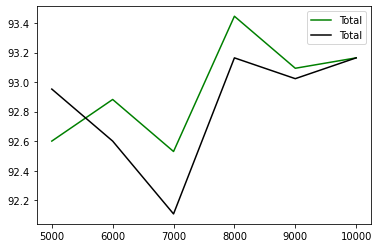

<Figure size 2.88e+06x7200 with 0 Axes>

In [ ]:
ax = plt.gca()

# line plot for math marks
# df_res.plot(kind = 'line',
#         x = 'Dimension',
#         y = 'X_English',
#         color = 'green',ax = ax)

# df_res.plot(kind = 'line',
#         x = 'Dimension',
#         y = 'X_French',
#         color = 'yellow',ax = ax)

# df_res.plot(kind = 'line',
#         x = 'Dimension',
#         y = 'X_Russian',
#         color = 'red',ax = ax)

df_res.plot(kind = 'line',
        y = 'Total',
        color = 'green',ax = ax)

df_res_rob.plot(kind = 'line',
        y = 'Total',
        color = 'black',ax = ax)

# df_res.plot(kind = 'line',
#         x = 'Dimension',
#         y = 'X_Dutch',
#         color = 'brown',ax = ax)


# df_res.plot(kind = 'line',
#         x = 'Dimension',
#         y = 'X_Italian',
#         color = 'violet',ax = ax)

# df_res.plot(kind = 'line',
#         x = 'Dimension',
#         y = 'X_Sweedish',
#         color = 'blue',ax = ax)

# df_res.plot(kind = 'line',
#         x = 'Dimension',
#         y = 'X_Turkish',
#         color = 'purple',ax = ax)

# df_res.plot(kind = 'line',
#         x = 'Dimension',
#         y = 'X_Danish',
#         color = 'indigo',ax = ax)

# df_res.plot(kind = 'line',
#         x = 'Dimension',
#         y = 'X_Spanish',
#         color = 'cyan',ax = ax)

# show the plot
f = plt.figure()
f.set_figwidth(40000)
f.set_figheight(100)
plt.show()

In [ ]:
  # #{"English", "French", "Spanish", "Portugeese", "Italian", "Russian", "Sweedish", "Dutch", "Turkish", "German", "Danish"}
  # #Counter(
  #     {'English': 1385,
  #      'French': 1014,
  #      'Spanish': 819,
  #      'Portugeese': 739,
  #      'Italian': 698,
  #      'Russian': 692,
  #      'Sweedish': 676,
  #      'Dutch': 546,
  #      'Turkish': 474,
  #      'German': 470,
  #      'Danish': 428}

In [ ]:
# For Robustness testing when Language vectors bits are changed by p%

# for i in range(len(dimensions)):
#   dim = dimensions[i]
#   letter_mappings = generateLetterMappings(dim)
#   print("Dimension: ", dim)
#   N_gram = 3
#   language_vectors_norm = getLangVect(dim, N_gram, trainData, letter_mappings)
#   language_vectors_rob = np.copy(language_vectors_norm)
#   language_vectors_rob = addNoise(language_vectors_rob)
#   print(np.unique(language_vectors_norm[0] - language_vectors_rob[0]))
#   # print(language_vectors)
#   df_res = test(dim, N_gram, testData, language_vectors_norm, df_res)
#   df_res_rob = test(dim, N_gram, testData, language_vectors_rob, df_res_rob)
#   print(df_res - df_res_rob)

In [ ]:
# noiseInLV = 0.05

# def flip(bit):
#   if(bit == 0):
#     return 1
#   else:
#     return 0

# def addNoise(lvs):
#   posi = list(range(0, dim))
#   for i in range(len(lvs)):
#     lvec = lvs[i]
#     # print(lvs[i])
#     random.shuffle(posi)
#     pos_to_flip = posi[0:int(noiseInLV*dim)]
#     for pos in pos_to_flip:
#       lvec[pos] = flip(lvec[pos])
#     lvs[i] = lvec
#     # print(lvs[i])
#   return lvs

In [ ]:
# dim = 50
# letter_mappings = generateLetterMappings(dim)
# N_gram = 3
# language_vectors_norm = getLangVect(dim, N_gram, trainData, letter_mappings)
# language_vectors_rob = np.copy(language_vectors_norm)
# language_vectors_rob = addNoise(language_vectors_rob)

In [24]:
def generateOdorVectors(data):
    odor_classes = data['y'].unique()
    odor_vectors = {}

    for odor_class in odor_classes:
        class_data = data[data['y'] == odor_class].drop('y', axis=1)
        # Generate a representative vector for each class
        odor_vectors[odor_class] = class_data.mean().values  # Using mean as a representative vector

    return odor_vectors

In [25]:
import numpy as np

def calculate_similarity(test_vector, odor_vectors):
    similarities = {}
    for odor_class, vector in odor_vectors.items():
        # Calculate Euclidean distance between the test vector and class vector
        similarity = np.linalg.norm(test_vector - vector)
        similarities[odor_class] = similarity

    # Return the class with the smallest distance
    return min(similarities, key=similarities.get)


In [27]:
testData

[    Dilution  VALENCE/PLEASANTNESS  BAKERY  SWEET  FRUIT  FISH  GARLIC  \
 0      0.100                   5.0     0.0   10.0    0.0   0.0     0.0   
 1      0.001                  55.0     0.0    0.0    0.0   0.0     0.0   
 2      0.100                  53.0     0.0   47.0    0.0   0.0     0.0   
 3      0.001                  41.0     0.0    0.0    0.0   0.0     0.0   
 4      0.100                  35.0     0.0    0.0    0.0   0.0     0.0   
 5      0.001                  58.0     0.0    0.0    0.0   0.0     0.0   
 6      0.100                  36.0     0.0    0.0    0.0   0.0     0.0   
 7      0.001                  48.0     6.0   36.0    0.0   0.0     0.0   
 8      0.100                  92.0     0.0   17.0    0.0   0.0     0.0   
 9      0.100                  76.0     0.0    0.0    0.0   0.0     0.0   
 10     0.100                  53.0     3.0   13.0   15.0   0.0     0.0   
 11     0.001                  54.0     0.0    1.0    1.0   0.0     0.0   
 12     0.100            

In [26]:
# Prepare test data (assuming 'test_data' is your test dataset)
test_vectors = testData.drop('y', axis=1).values

# Generate odor vectors from your original data
odor_vectors = generateOdorVectors(trainData)

# Predict classes for test vectors
predicted_classes = []
for test_vector in test_vectors:
    predicted_class = calculate_similarity(test_vector, odor_vectors)
    predicted_classes.append(predicted_class)

# Evaluate accuracy by comparing predicted classes against actual classes in the test data
accuracy = sum(predicted_classes == testData['y']) / len(testData)
print(f"Accuracy: {accuracy * 100:.2f}%")

AttributeError: 'list' object has no attribute 'drop'